In [19]:
# Imports:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import dxchange
import nibabel as nib
import tifffile
from skimage.filters import threshold_otsu

# Set your folder path here:
os.chdir('/dtu/3d-imaging-center/courses/02510/groups/group_Anhinga/Anne/DL-3D-Anhinga')

In [20]:
folder_path = '/dtu/3d-imaging-center/courses/02510/data/Bugs'
file_name = 'bugnist_128/AC/bcrick_1_000.tif'
absolute_path = os.path.join(folder_path, file_name)
data = tifffile.imread(absolute_path)

In [21]:
print(data.shape)
print(data.dtype)
print(data.max())
print(data.min())

(128, 64, 64)
uint8
182
0


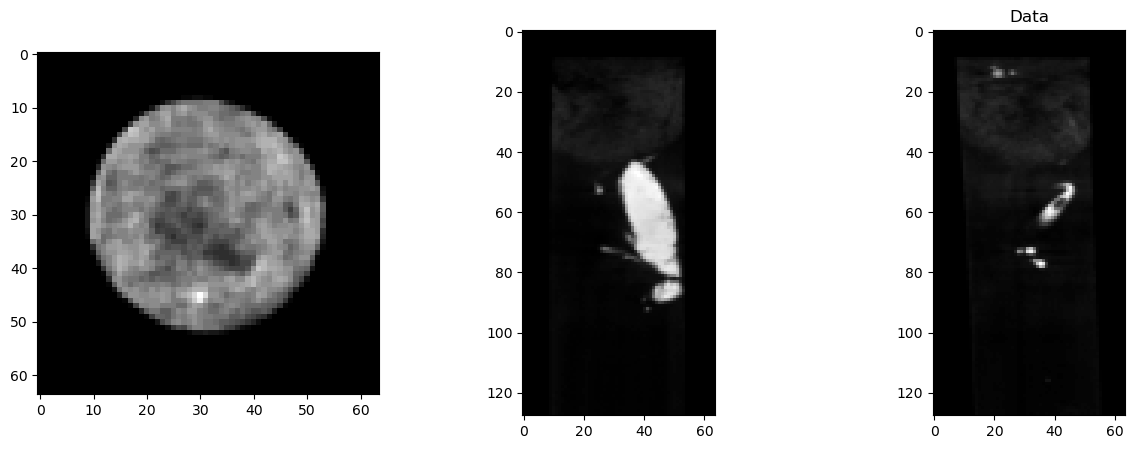

In [22]:
slice = 30
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data[slice, :, :], cmap='gray')
ax[1].imshow(data[:,slice, :], cmap='gray')
ax[2].imshow(data[:, :, slice], cmap='gray')
plt.title('Data')
plt.show()

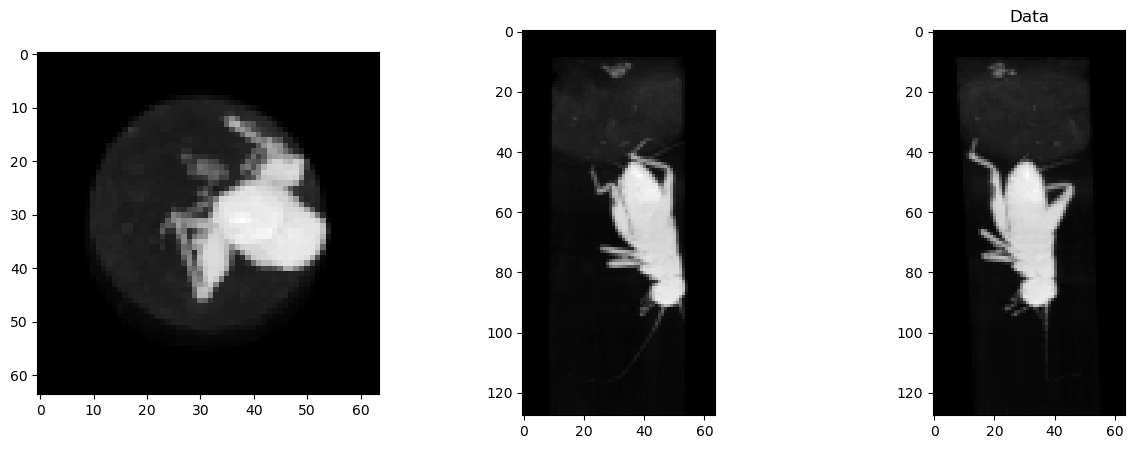

In [23]:
slice = 100
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data.max(axis=0), cmap='gray')
ax[1].imshow(data.max(axis=1), cmap='gray')
ax[2].imshow(data.max(axis=2), cmap='gray')
plt.title('Data')
plt.show()

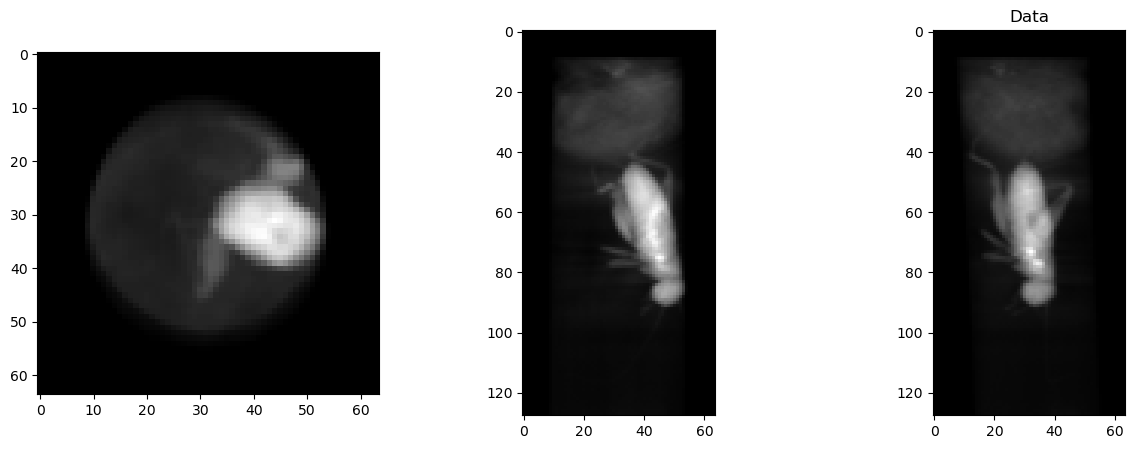

In [24]:
slice = 100
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(data.sum(axis=0), cmap='gray')
ax[1].imshow(data.sum(axis=1), cmap='gray')
ax[2].imshow(data.sum(axis=2), cmap='gray')
plt.title('Data')
plt.show()

In [31]:
save_path = 'data'
projection = "sum"
dataset_path = os.path.join(folder_path, f'bugnist_{str(128).zfill(3)}')
folders = os.listdir(dataset_path)
for folder in folders:
    files = os.listdir(os.path.join(dataset_path, folder))
    for file in files:   
        tmp_path = os.path.join(dataset_path, folder, file)
        data = tifffile.imread(tmp_path)
        #print(data.shape)
        for i in range(3):
            #print(i)
            if projection == "max":
                data_new = data.max(axis=i)
            elif projection == "sum":
                data_new = data.sum(axis=i)
            elif projection == "mean":
                data_new = data.mean(axis=i)
            else:
                raise ValueError("Unknown projection type")
            
            #print(data_new.shape)
            new_folder = os.path.splitext(file)[0]
            save_path_tmp = os.path.join(save_path, folder, new_folder)
            if not os.path.exists(save_path_tmp):
                os.makedirs(save_path_tmp)

            new_file = f'{str(i).zfill(2)}.png'
            save_path_tmp = os.path.join(save_path_tmp, new_file)  
            plt.imsave(save_path_tmp, data_new, cmap='gray')
            # save as np
            np.save(save_path_tmp.replace('.png', '.npy'), data_new)